 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [288]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [289]:
## Import csv's using read_csv
## Check all data is numerical
## clean the data - just drop nulls in this context

In [290]:
# Reading whale returns
whale_df = pd.read_csv('whale_returns.csv', index_col='Date', parse_dates=True)
whale_df = whale_df.astype(float)

In [291]:
# Count nulls
print("Whale DataFrame null values: ")
print(whale_df.isnull().sum())

Whale DataFrame null values: 
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [292]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [293]:
# Reading algorithmic returns
algo_df = pd.read_csv('algo_returns.csv', index_col='Date', parse_dates=True)
algo_df = algo_df.astype(float)

In [294]:
# Count nulls
print("Algorithm DataFrame null values: ")
print(algo_df.isnull().sum())

Algorithm DataFrame null values: 
Algo 1    0
Algo 2    6
dtype: int64


In [295]:
# Drop nulls
algo_df.dropna(inplace=True)


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [296]:
# Reading S&P TSX 60 Closing Prices
sp_df = pd.read_csv('sp_tsx_history.csv', index_col='Date', parse_dates=True)


In [297]:
# Check Data Types
sp_df

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [298]:
# Fix Data Types
## need to get rid of dolla signs
# If dollar signs ($) present in sp_df, remove them
if sp_df['Close'].dtype == 'object':
    sp_df['Close'] = sp_df['Close'].str.replace('$', '').str.replace(',', '').astype('float')



In [299]:
# Calculate Daily Returns
sp_df = sp_df.pct_change()
sp_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [300]:
# Drop nulls
print("S&P TSX 60 DataFrame null values: ")
print(sp_df.isnull().sum())

S&P TSX 60 DataFrame null values: 
Close    1
dtype: int64


In [301]:
sp_df.dropna(inplace=True)

In [302]:
# Rename `Close` Column to be specific to this portfolio.
sp_df = sp_df.rename(columns={'Close': 'SP_TSX'})
sp_df

,SP_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [303]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
#Concatenate our dataframes
all_df = pd.concat([whale_df, algo_df, sp_df], axis='columns', join='inner')
all_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

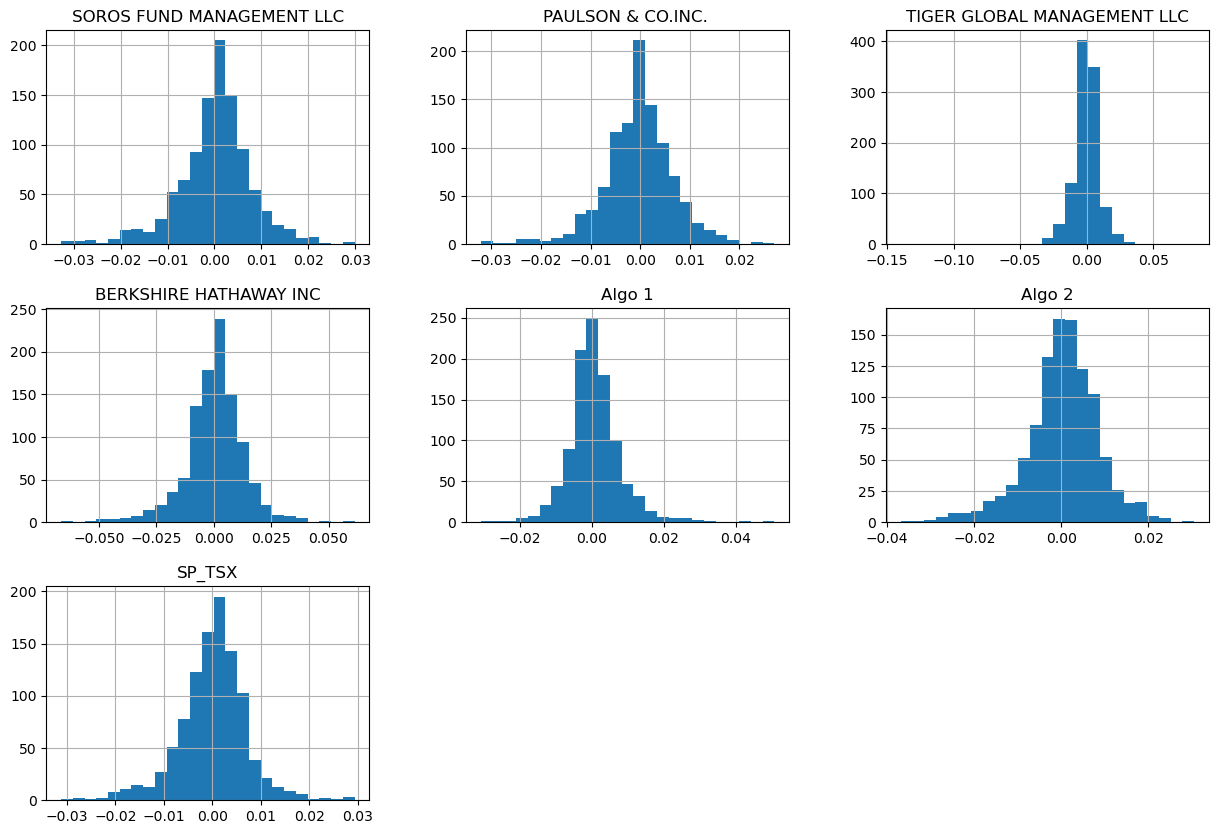

In [304]:
# Plot daily returns of all portfolios
# I've used historgrams here to look at each portfolio individually

all_df.hist(bins=25, figsize=(15,10))
plt.show()

#### Calculate and Plot cumulative returns.

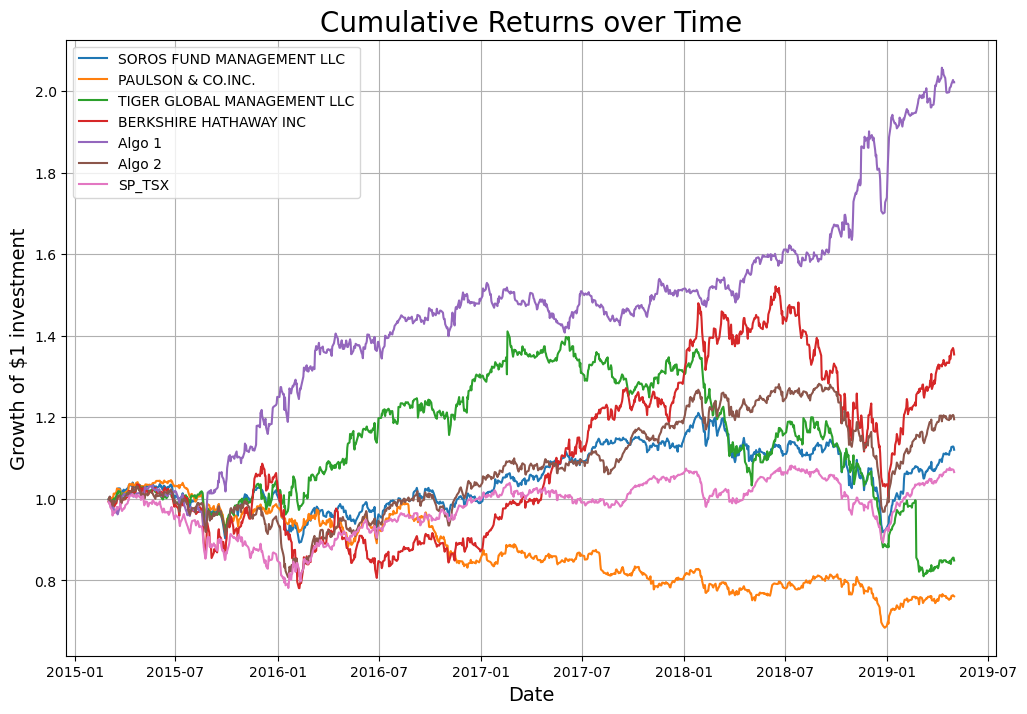

In [305]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_df).cumprod()


# Plot cumulative returns
# Plot the cumulative returns
cumulative_returns = (1 + all_df).cumprod()

plt.figure(figsize=(12,8))
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)
plt.title("Cumulative Returns over Time", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Growth of $1 investment", fontsize=14)
plt.grid(True)
plt.legend()


In [306]:
#Calculate who beat the S&P TSX 60 Over time?

#find the last line of the dataframe to get the final cumulative value
#check this against the SP_TSX
outperformance = cumulative_returns.iloc[-1] > cumulative_returns['SP_TSX'].iloc[-1]

print("Portfolios that outperformed the S&P TSX 60:")
print(outperformance[outperformance == True])

Portfolios that outperformed the S&P TSX 60:
SOROS FUND MANAGEMENT LLC    True
BERKSHIRE HATHAWAY INC       True
Algo 1                       True
Algo 2                       True
Name: 2019-05-01 00:00:00, dtype: bool


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


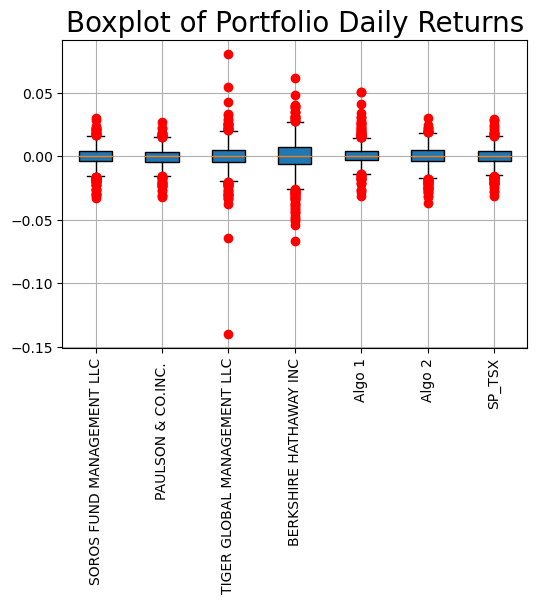

In [307]:
# Box plot to visually show risk

plt.figure(figsize=(6,4))
plt.boxplot(all_df.values, patch_artist=True, notch=False, vert=1, sym="ro")
plt.xticks(ticks=range(1,len(all_df.columns)+1), labels=all_df.columns, rotation=90)
plt.title("Boxplot of Portfolio Daily Returns", fontsize=20)
plt.grid(True)

### Calculate Standard Deviations

In [308]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = all_df.std()

# We can also sort and display the df from smallest to largest
portfolio_std = portfolio_std.sort_values()
print(portfolio_std)


PAULSON & CO.INC.              0.006982
SP_TSX                         0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [309]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = portfolio_std['SP_TSX']


# Determine which portfolios are riskier than the S&P TSX 60

# Drop 'SP_TSX' from the Series
portfolio_std_without_sp_tsx = portfolio_std.drop('SP_TSX')

# Compare the standard deviation (risk) of 'SP_TSX' with other portfolios
riskier_than_sp_tsx = portfolio_std_without_sp_tsx > portfolio_std['SP_TSX']

# Print the result
print("Portfolio name              Riskier?")
print(riskier_than_sp_tsx)

Portfolio name              Riskier?
PAULSON & CO.INC.              False
Algo 1                          True
SOROS FUND MANAGEMENT LLC       True
Algo 2                          True
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool


### Calculate the Annualized Standard Deviation

In [310]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = portfolio_std * np.sqrt(252)

# Print the result
print(annualized_std)

PAULSON & CO.INC.              0.110841
SP_TSX                         0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

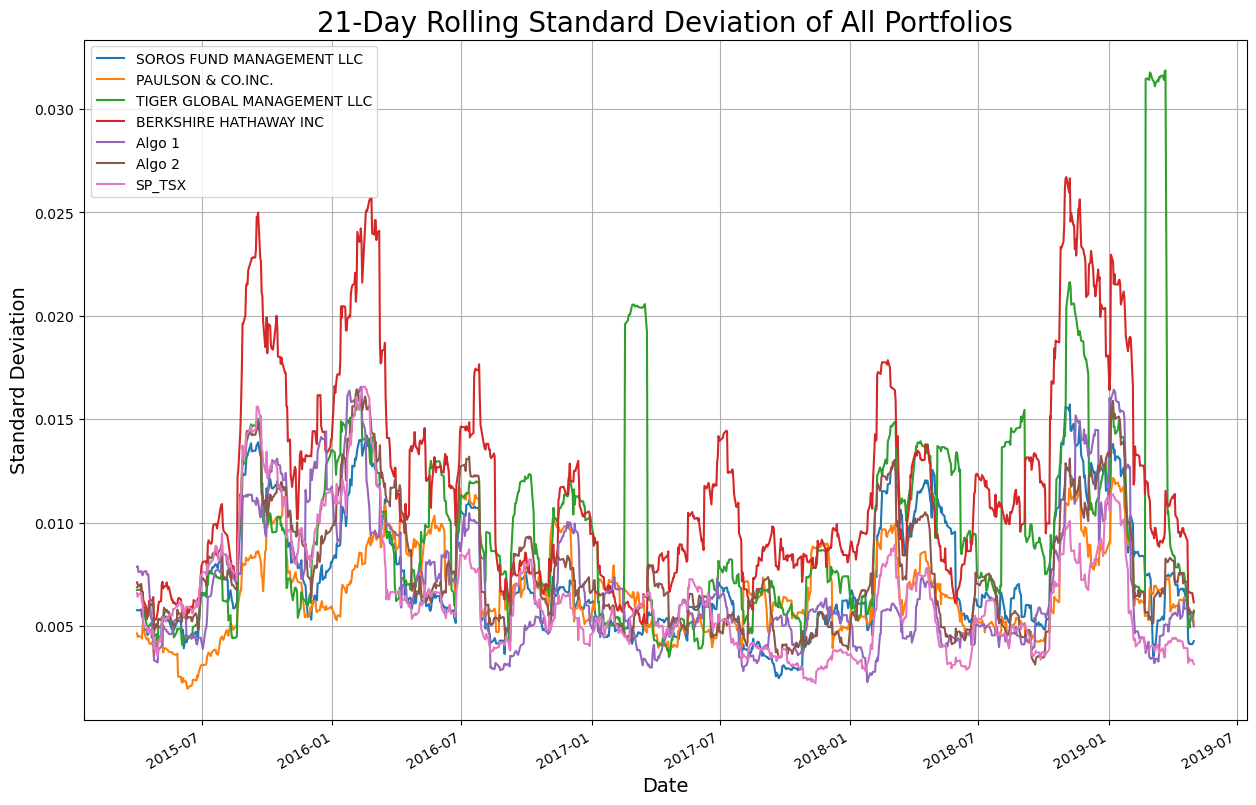

In [311]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = all_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(15,10))
plt.title("21-Day Rolling Standard Deviation of All Portfolios", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Standard Deviation", fontsize=14)
plt.grid(True)
plt.show()

### Calculate and plot the correlation

In [312]:
# Calculate the correlation
correlation = all_df.corr()

# Print the correlation matrix
pd.set_option('display.width', 200)

# Print the correlation matrix
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Apply the mask to the correlation matrix
correlation_masked = correlation.mask(mask)

print(correlation_masked)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1   Algo 2  SP_TSX
SOROS FUND MANAGEMENT LLC                          NaN                 NaN                          NaN                     NaN       NaN      NaN     NaN
PAULSON & CO.INC.                             0.697076                 NaN                          NaN                     NaN       NaN      NaN     NaN
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034                          NaN                     NaN       NaN      NaN     NaN
BERKSHIRE HATHAWAY INC                        0.750181            0.540033                     0.423524                     NaN       NaN      NaN     NaN
Algo 1                                        0.313795            0.266363                     0.161236                0.289378       NaN      NaN     NaN
Algo 2                                        0.826667            0.67

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

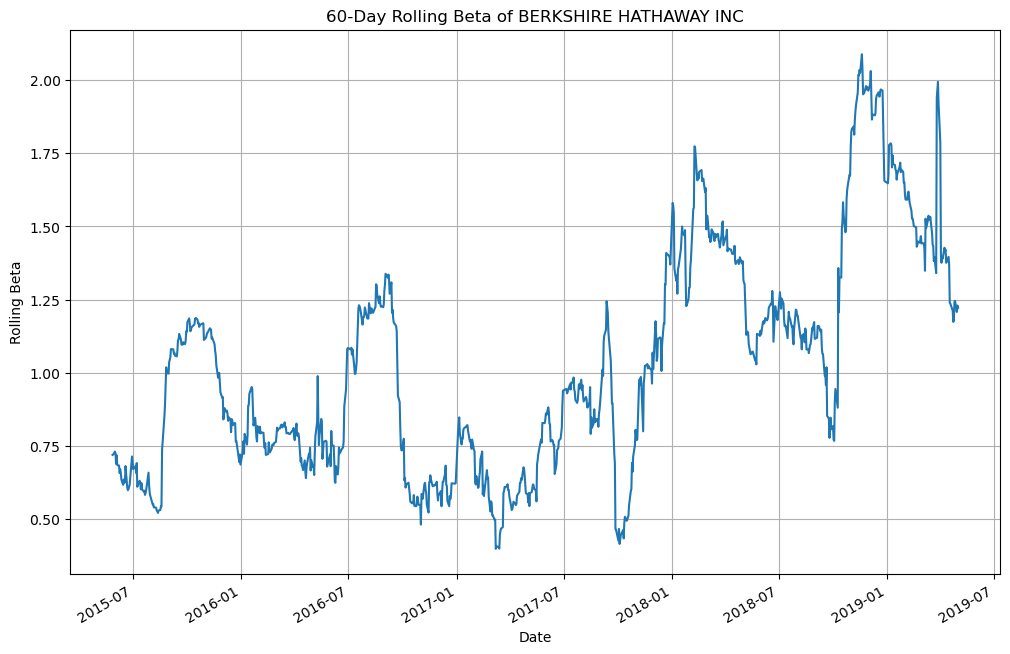

In [313]:
# Calculate covariance of a single portfolio
### I will choose BERKSHIRE HATHAWAY INC as my chosen portfolio

# Calculate the overall covariance
overall_covariance = all_df['BERKSHIRE HATHAWAY INC'].cov(all_df['SP_TSX'])

# Calculate variance of S&P TSX
overall_variance = all_df['SP_TSX'].var()

# Computing beta
beta = overall_covariance / overall_variance
beta

# Calculate 60-day rolling covariance of BERKSHIRE HATHAWAY INC vs. SP_TSX
rolling_covariance = all_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_df['SP_TSX'])

# Calculate 60-day rolling variance of SP_TSX
rolling_variance = all_df['SP_TSX'].rolling(window=60).var()

# Calculate the rolling beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend

plt.figure(figsize=(12,8))
rolling_beta.plot()
plt.title("60-Day Rolling Beta of BERKSHIRE HATHAWAY INC")
plt.xlabel("Date")
plt.ylabel("Rolling Beta")
plt.grid(True)
plt.show()




## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

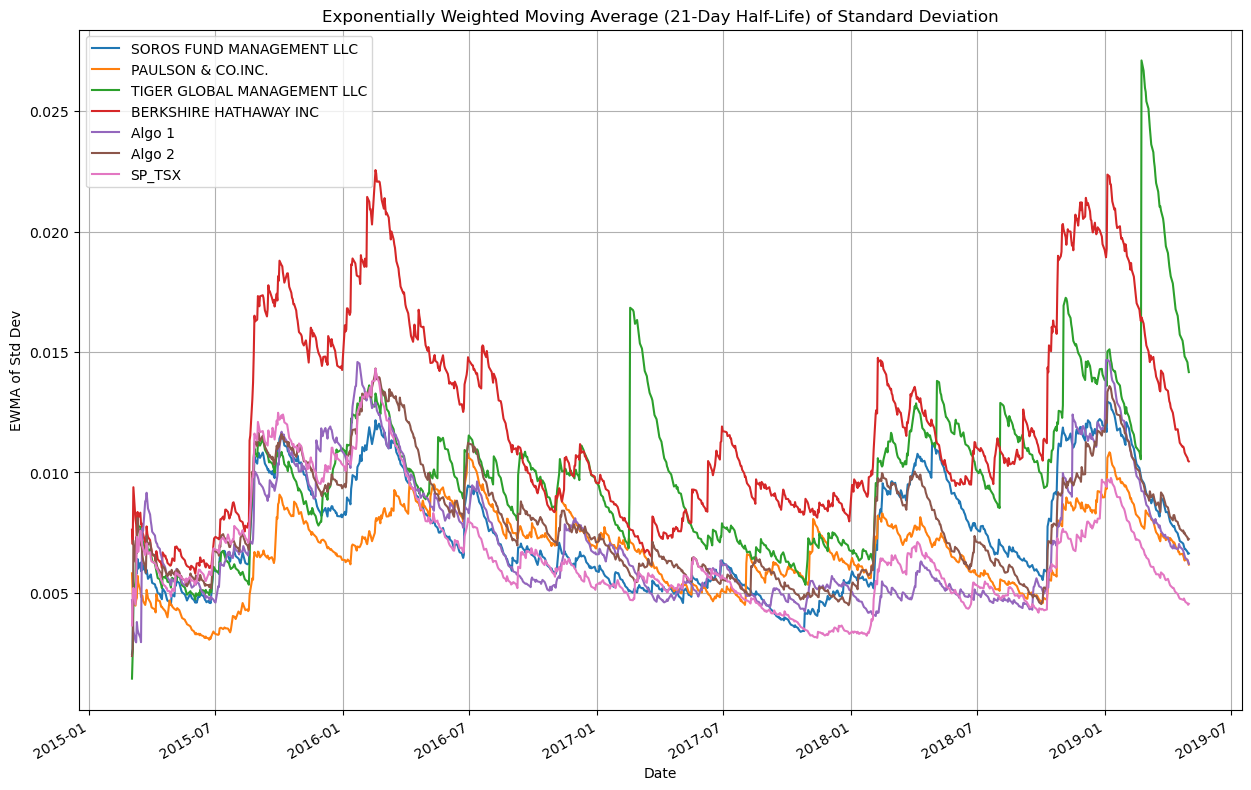

In [314]:
# Use `ewm` to calculate the rolling window


# Calculate the EWMA (Exponentially Weighted Moving Average) with a 21-day half-life
ewma_df = all_df.ewm(halflife=21).std()

# Plot the result
ewma_df.plot(figsize=(15,10))
plt.title("Exponentially Weighted Moving Average (21-Day Half-Life) of Standard Deviation")
plt.xlabel("Date")
plt.ylabel("EWMA of Std Dev")
plt.grid(True)
plt.show()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [315]:
# Annualized Sharpe Ratios
# Calculate the annualized average return data for the portfolios
average_annual_return = all_df.mean() * 252

# Calculate the annualized standard deviation
annualized_std_dev = all_df.std() * np.sqrt(252)

# Define the risk free rate
risk_free_rate = 0.0525

# Adjust the annualized average return data for the risk-free rate
adjusted_annual_return = (average_annual_return - risk_free_rate)

# Calculate the adjusted Sharpe ratios
adjusted_sharpe_ratios = adjusted_annual_return / annualized_std_dev
adjusted_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.135796
PAULSON & CO.INC.             -1.021246
TIGER GLOBAL MANAGEMENT LLC   -0.448347
BERKSHIRE HATHAWAY INC         0.209185
Algo 1                         1.055720
Algo 2                        -0.000378
SP_TSX                        -0.274610
dtype: float64

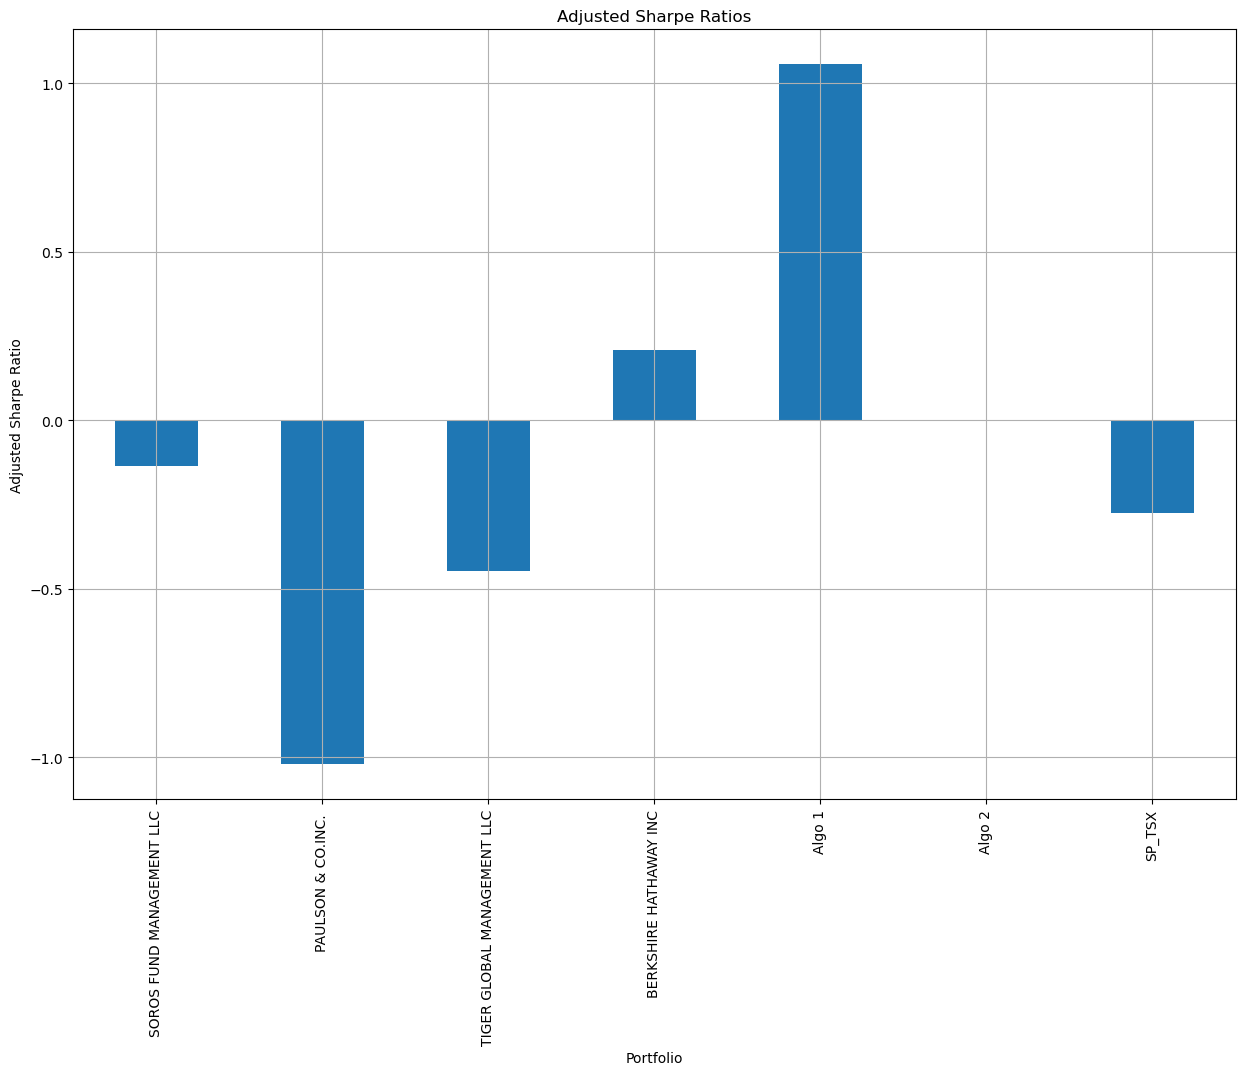

In [316]:
# Visualize the sharpe ratios as a bar plot

# Plot the adjusted Sharpe ratios
adjusted_sharpe_ratios.plot(kind='bar', figsize=(15,10))
plt.title('Adjusted Sharpe Ratios')
plt.xlabel('Portfolio')
plt.ylabel('Adjusted Sharpe Ratio')
plt.grid(True)
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Both Algo's outperform the S&P TSX 60 as their Sharpe ratios are greater.
Algo 1 outperforms all of the Whales.
Algo 2 outperforms all of the Whales except for Berkshire Hathaway Inc.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [317]:
# Reading data from 1st stock - NYSE:DE - John Deere
john_deere = pd.read_csv('john_deere.csv', index_col='Date', parse_dates=True)
print(john_deere.head())

                     Close
Date                      
01/07/2013 16:00:00  81.31
02/07/2013 16:00:00  80.90
03/07/2013 16:00:00  80.99
05/07/2013 16:00:00  81.44
08/07/2013 16:00:00  81.35


In [318]:
# Reading data from 2nd stock - Northrop Grummin - NYSE:NOC

northrop_grumman = pd.read_csv('northrop_grummin.csv', index_col='Date', parse_dates=True)
print(northrop_grumman.head())

                     Close
Date                      
01/07/2013 16:00:00  83.35
02/07/2013 16:00:00  82.17
03/07/2013 16:00:00  82.93
05/07/2013 16:00:00  83.95
08/07/2013 16:00:00  85.09


In [319]:
# Reading data from 3rd stock - Franco Nevada - NYSE:FNV
franco_nevada = pd.read_csv('franco_nevada.csv', index_col='Date', parse_dates=True)
print(franco_nevada.head())

                     Close
Date                      
01/07/2013 16:00:00  36.30
02/07/2013 16:00:00  35.41
03/07/2013 16:00:00  36.21
05/07/2013 16:00:00  34.11
08/07/2013 16:00:00  33.89


In [320]:
# Combine all stocks in a single DataFrame

# Rename 'Close' column to the stock names
john_deere = john_deere.rename(columns={'Close': 'John Deere'})
northrop_grumman = northrop_grumman.rename(columns={'Close': 'Northrop Grumman'})
franco_nevada = franco_nevada.rename(columns={'Close': 'Franco Nevada'})

# Concatenate the dataframes
df_dd = pd.concat([john_deere, northrop_grumman, franco_nevada], axis=1)
df_dd

,John Deere,Northrop Grumman,Franco Nevada
Date,,,
01/07/2013 16:00:00,81.31,83.35,36.30
02/07/2013 16:00:00,80.90,82.17,35.41
03/07/2013 16:00:00,80.99,82.93,36.21
05/07/2013 16:00:00,81.44,83.95,34.11
08/07/2013 16:00:00,81.35,85.09,33.89
...,...,...,...
23/06/2023 16:00:00,404.45,454.05,139.15
26/06/2023 16:00:00,410.19,448.02,139.26
27/06/2023 16:00:00,409.51,448.44,138.73


In [321]:
## Re-organising the date colmns
df_dd = df_dd.reset_index()


In [322]:
# Reorganize portfolio data by having a column per symbol
print(df_dd.head())

                  Date  John Deere  Northrop Grumman  Franco Nevada
0  01/07/2013 16:00:00       81.31             83.35          36.30
1  02/07/2013 16:00:00       80.90             82.17          35.41
2  03/07/2013 16:00:00       80.99             82.93          36.21
3  05/07/2013 16:00:00       81.44             83.95          34.11
4  08/07/2013 16:00:00       81.35             85.09          33.89


In [323]:
# Calculate daily returns
df_dd['John Deere'] = df_dd['John Deere'].pct_change()
df_dd['Northrop Grumman'] = df_dd['Northrop Grumman'].pct_change()
df_dd['Franco Nevada'] = df_dd['Franco Nevada'].pct_change()

# Drop NAs
df_dd = df_dd.dropna()

# Display sample data
print(df_dd.head())

                  Date  John Deere  Northrop Grumman  Franco Nevada
1  02/07/2013 16:00:00   -0.005042         -0.014157      -0.024518
2  03/07/2013 16:00:00    0.001112          0.009249       0.022592
3  05/07/2013 16:00:00    0.005556          0.012300      -0.057995
4  08/07/2013 16:00:00   -0.001105          0.013580      -0.006450
5  09/07/2013 16:00:00    0.031469          0.005171       0.017114


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [324]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
# Create a new DataFrame with 'Date' column, then mutliply the weights by the list value

df_portfolio = df_dd.copy()  # Copy the original DataFrame
df_portfolio['John Deere'] *= weights[0]
df_portfolio['Northrop Grumman'] *= weights[1]
df_portfolio['Franco Nevada'] *= weights[2]
df_portfolio['Portfolio Return'] = df_portfolio[['John Deere', 'Northrop Grumman', 'Franco Nevada']].sum(axis=1)

df_final = df_portfolio[['Date', 'Portfolio Return']]
print(df_final.head())



                  Date  Portfolio Return
1  02/07/2013 16:00:00         -0.014573
2  03/07/2013 16:00:00          0.010985
3  05/07/2013 16:00:00         -0.013380
4  08/07/2013 16:00:00          0.002008
5  09/07/2013 16:00:00          0.017918


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [326]:
# Join your returns DataFrame to the original returns DataFrame
### I had some date problems, so used stack overflow to get through this :'( 

# Convert 'Date' column in df_final to datetime
df_final['Date'] = pd.to_datetime(df_final['Date'], format='%d/%m/%Y %H:%M:%S')

# Extract the date part and convert to 'yyyy-mm-dd' format
df_final['Date'] = df_final['Date'].dt.date

df_final


/var/folders/22/c3r98x554qv7s1kh3_393tcm0000gn/T/ipykernel_1161/913433103.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Date'] = pd.to_datetime(df_final['Date'], format='%d/%m/%Y %H:%M:%S')
/var/folders/22/c3r98x554qv7s1kh3_393tcm0000gn/T/ipykernel_1161/913433103.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Date'] = df_final['Date'].dt.date


,Date,Portfolio Return
1,2013-07-02,-0.014573
2,2013-07-03,0.010985
3,2013-07-05,-0.013380
4,2013-07-08,0.002008
5,2013-07-09,0.017918
...,...,...
2512,2023-06-23,-0.010343
2513,2023-06-26,0.000567
2514,2023-06-27,-0.001509
2515,2023-06-28,-0.012634


In [360]:
all_df['Date'] = pd.to_datetime(all_df['Date'])

# Convert 'Date' in df_final to datetime, without extracting the date part
df_final['Date'] = pd.to_datetime(df_final['Date'], format='%d/%m/%Y %H:%M:%S')

# Now you can merge
result = pd.merge(all_df, df_final, on='Date')
result

/var/folders/22/c3r98x554qv7s1kh3_393tcm0000gn/T/ipykernel_1161/2896321323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Date'] = pd.to_datetime(df_final['Date'], format='%d/%m/%Y %H:%M:%S')


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX,Portfolio Return
0,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.010179
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.007215
2,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.001023
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.020901
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.001325
...,...,...,...,...,...,...,...,...,...
1024,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.010314
1025,2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.019230
1026,2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003475
1027,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183,0.009102


In [359]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
result.isna().sum()


Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP_TSX                         0
Portfolio Return               0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [361]:
# Calculate the annualized `std`
# Select numeric columns only (excluding 'Date')
numeric_columns = result.select_dtypes(include=np.number)

# Calculate the standard deviation for numeric columns
std_dev = numeric_columns.std()

# Assume 252 trading days in a year
annualised_std_dev = std_dev * np.sqrt(252)
print(annualised_std_dev)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP_TSX                         0.111664
Portfolio Return               0.168169
dtype: float64


### Calculate and plot rolling `std` with 21-day window

In [357]:
# Calculate rolling standard deviation

rolling_std_dev = result.drop(columns=['Date']).rolling(window=21).std()

# Combine the 'Date' column back to the rolling_std_dev dataframe
rolling_std_dev['Date'] = result['Date']
rolling_std_dev

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX,Portfolio Return,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-03
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-04
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-05
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-06
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-09
...,...,...,...,...,...,...,...,...,...
1024,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370,0.009321,2019-04-25
1025,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321,0.010116,2019-04-26
1026,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356,0.010129,2019-04-29
1027,0.004199,0.005408,0.005419,0.006323,0.005294,0.005600,0.003240,0.010198,2019-04-30


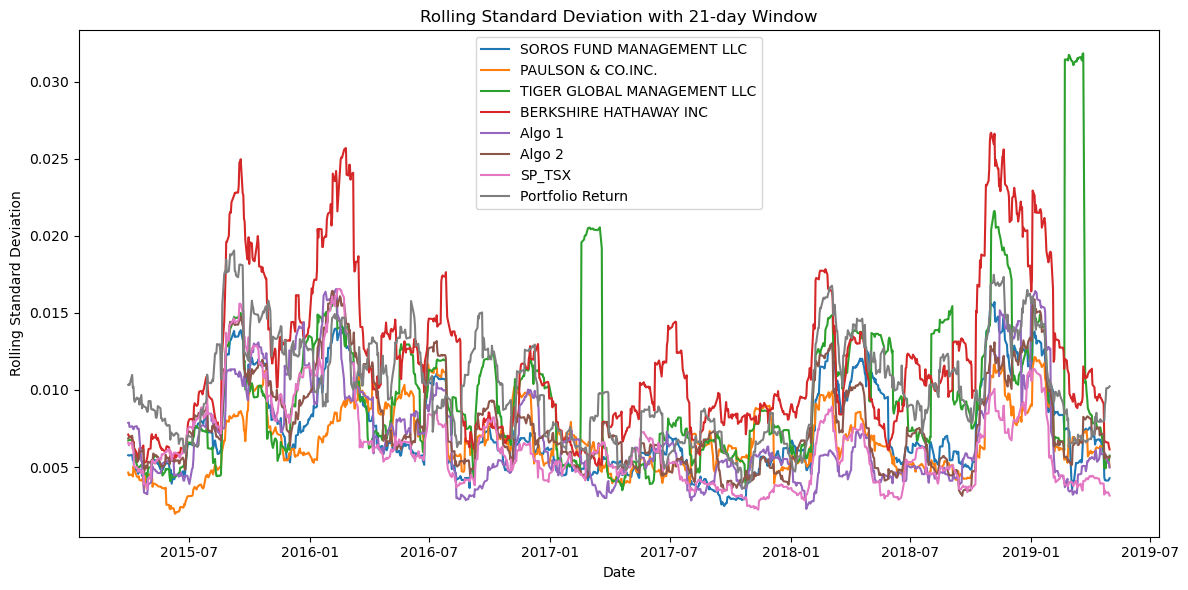

In [363]:


# Plot rolling standard deviation

# Plot the rolling standard deviation for each column
plt.figure(figsize=(12, 6))

# Exclude the 'Date' column from the plot
columns_to_plot = rolling_std_dev.columns.drop('Date')

for column in columns_to_plot:
    plt.plot(rolling_std_dev['Date'], rolling_std_dev[column], label=column)

plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.title('Rolling Standard Deviation with 21-day Window')
plt.legend()
plt.tight_layout()
plt.show()


### Calculate and plot the correlation

In [365]:
# Calculate and plot the correlation
correlation_matrix = result.corr()
correlation_matrix


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX,Portfolio Return
Date,1.000000,0.004690,0.002928,-0.061198,0.018808,0.000723,0.009662,0.024928,-0.011887
SOROS FUND MANAGEMENT LLC,0.004690,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930,0.466055
PAULSON & CO.INC.,0.002928,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511,0.341758
TIGER GLOBAL MANAGEMENT LLC,-0.061198,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583,0.325091
BERKSHIRE HATHAWAY INC,0.018808,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250,0.375939
Algo 1,0.000723,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276,0.186457
Algo 2,0.009662,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370,0.498770
SP_TSX,0.024928,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000,0.544560
Portfolio Return,-0.011887,0.466055,0.341758,0.325091,0.375939,0.186457,0.498770,0.544560,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

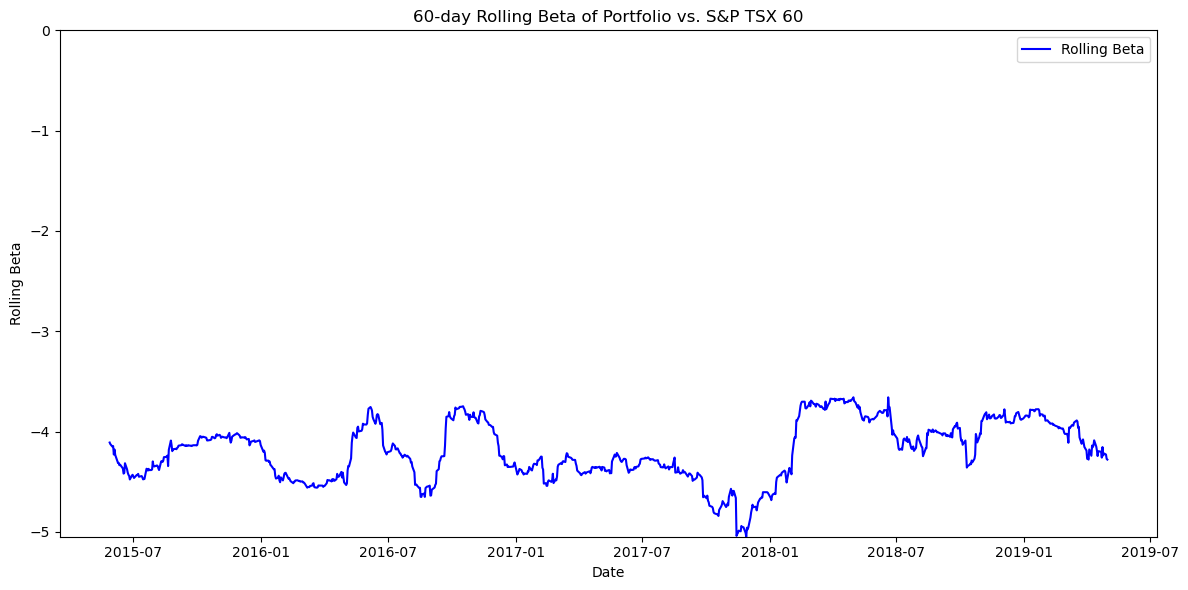

In [370]:
# Calculate and plot Beta

# Calculate portfolio returns (difference between 'Portfolio Return' and 'SP_TSX')
result['Portfolio Return'] = result['Portfolio Return'] - result['SP_TSX']

# Calculate rolling covariance between 'Portfolio Return' and 'SP_TSX'
rolling_cov = result['Portfolio Return'].rolling(window=60).cov(result['SP_TSX'])

# Calculate rolling variance of 'SP_TSX'
rolling_var_tsx = result['SP_TSX'].rolling(window=60).var()

# Calculate rolling beta
rolling_beta = rolling_cov / rolling_var_tsx

# Plot the rolling beta
plt.figure(figsize=(12, 6))
plt.plot(result['Date'], rolling_beta, label='Rolling Beta', color='blue')
plt.xlabel('Date')
plt.ylabel('Rolling Beta')
plt.title('60-day Rolling Beta of Portfolio vs. S&P TSX 60')
plt.ylim(rolling_beta.min(), 0)  # Set the y-axis limits
plt.legend()
plt.tight_layout()
plt.show()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [372]:
# Calculate Annualized Sharpe Ratios

# Calculate the annualized average return data for the 'result' dataframe
average_annual_return_new = result.drop(columns=['Date']).mean() * 252

# Calculate the annualized standard deviation for the 'result' dataframe
annualized_std_dev_new = result.drop(columns=['Date']).std() * np.sqrt(252)

# Define the risk-free rate
risk_free_rate = 0.0525

# Adjust the annualized average return data for the risk-free rate
adjusted_annual_return_new = average_annual_return_new - risk_free_rate

# Calculate the Sharpe ratios
sharpe_ratios_new = adjusted_annual_return_new / annualized_std_dev_new

sharpe_ratios_new


SOROS FUND MANAGEMENT LLC     -0.135796
PAULSON & CO.INC.             -1.021246
TIGER GLOBAL MANAGEMENT LLC   -0.448347
BERKSHIRE HATHAWAY INC         0.209185
Algo 1                         1.055720
Algo 2                        -0.000378
SP_TSX                        -0.274610
Portfolio Return              -0.026201
dtype: float64

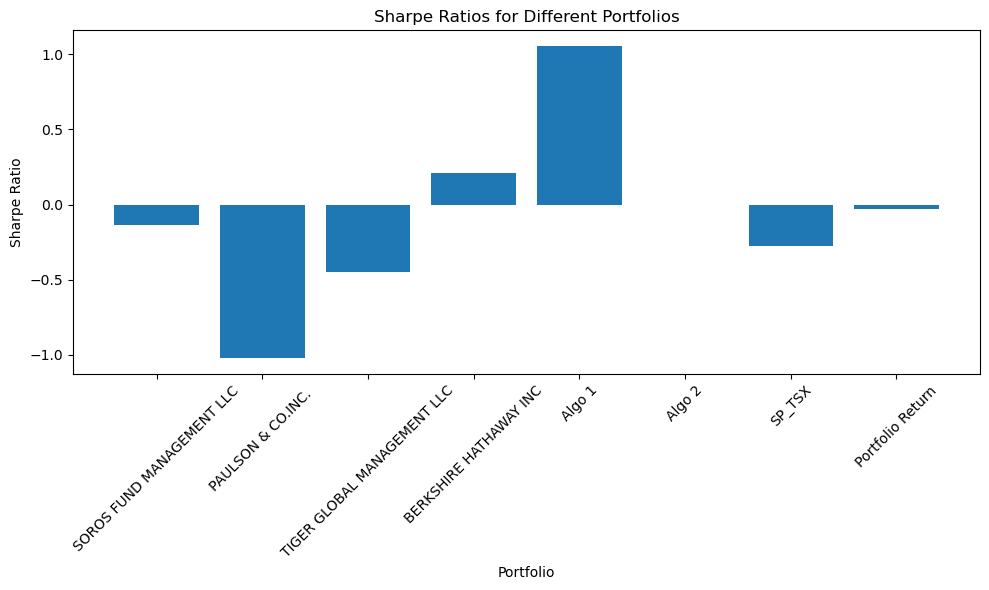

In [373]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sharpe_ratios_new.index, sharpe_ratios_new.values)

plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios for Different Portfolios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### How does your portfolio do?

 My portfolio does rather well.  I manage to beat the SP TSX 60 on a risk-adjusted basis.  
 I did not manage to beat Algo 1, or the World's Best investors at Birkshire Hathaway, but having such a small Sharpe ratio is quite an achievment.  Maybe I should consider actually investing in these 3 stocks based on the historical data.
